# Análise de clustering das notícias coletadas (pós filtros e classificação)

- Autor: Daniel Saraiva Leite - 2023
- Projeto Análise de sentimentos sobre notícias do tema ESG
- Trabalho de conclusão de curso - MBA Digital Business USP Esalq

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielsaraivaleite/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster: 0


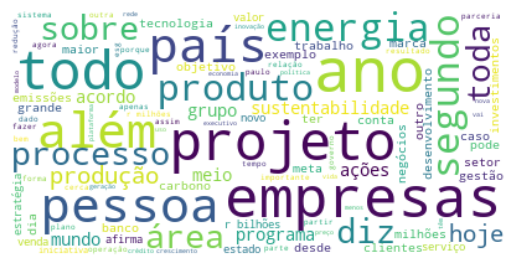

Cluster: 1


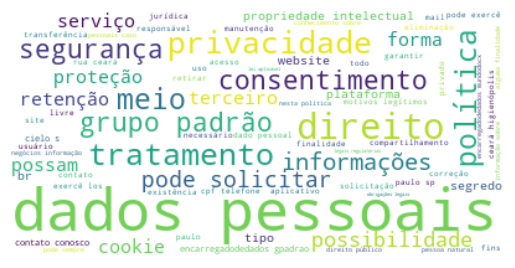

Cluster: 2


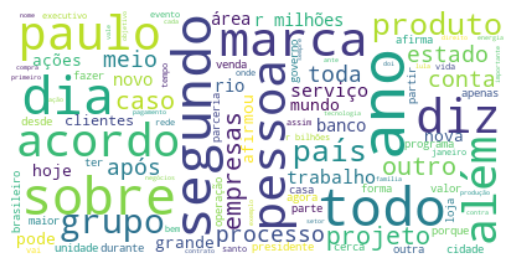

In [20]:
import pandas as pd
import wikipedia
from nltk.corpus import stopwords 
import nltk
from sklearn.cluster import KMeans
nltk.download('stopwords')
import matplotlib.pyplot as plt



df = pd.read_excel('datasets/sentimento_base_noticias.xlsx')

sw = stopwords.words('portuguese')
sw.append('petrobras')
sw.append('empresa')
sw.append('companhia')
sw.append('mercado')
sw.append('ainda')
sw.append('cliente')
sw.append('disse')
sw.append('investimento')
sw.append('negócio')
sw.append('brasil')


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'portuguese'})
X = vectorizer.fit_transform((df['texto_completo']))



true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
df['cluster']=model.labels_



from wordcloud import WordCloud
#result={'cluster':labels,'wiki':wiki_lst}
#result=pd.DataFrame(result)
result = df
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['texto_completo'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = sw).generate(text)
   print('Cluster: {}'.format(k))
   #print('Titles')
   #titles=wiki_cl[wiki_cl.cluster==k]['title']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()


In [21]:
df.groupby(by=['classificacao', 'cluster']).count()

titulo  data_publicacao   url  fonte  empresa  \
classificacao cluster                                                  
E             0          1670             1670  1670   1670     1670   
              2           693              693   693    693      693   
G             0           881              881   881    881      881   
              1           129              129   129    129      129   
              2          1974             1974  1974   1974     1974   
S             0           859              859   859    859      859   
              2          1259             1259  1259   1259     1259   

                       texto_completo  citacoes_empresa  demais_citacoes  \
classificacao cluster                                                      
E             0                  1670              1670             1670   
              2                   693               693              693   
G             0                   881               881              881   
              1                   129               129              129   
              2                  1974              1974             1974   
S             0                   859               859              859   
              2                  1259              1259             1259   

                       relevante  texto_ajustado  resumo  polaridade_texto  \
classificacao cluster                                                        
E             0             1670            1670    1670              1670   
              2              693             693     693               693   
G             0              881             881     881               881   
              1              129             129     129               129   
              2             1974            1974    1974              1974   
S             0              859             859     859               859   
              2             1259            1259    1259              1259   

                       polaridade_titulo  polaridade  
classificacao cluster                                 
E             0                     1670        1670  
              2                      693         693  
G             0                      881         881  
              1                      129         129  
              2                     1974        1974  
S             0                      859         859  
              2                     1259        1259